- Read the data by using read_csv
- Check the number of rows and columns unsing shape
- Check for the missing values using isnull()
- Observe the dtypes of columns
- Draw the histrograms for all numerical columns
    - check how the distribution is?
    - are there any skewed columns
- Observe the values range in each column and mean,std using describe()
- Create a copy of the data. and separate the color column and store it in varible target.
- Store all other columns data as a DataFrame with name features
- Apply Kmeans clustering with no of clusters as 2
- Compare the resulting clusters with the original color column
- Apply scaling for all the numerical columns
- Apply Kmeans clustering with no of clusters as 2
- Compare the resulting clusters with the original color column
- Apply Kmeans with different cluster numbers
- Draw a plot by taking no of clusters on x axis and Inertia(Total intra Cluster distance) on y axis.Choose the best no of clusters for the data


In [1]:
# import the required packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 

In [2]:
# Read the data by using read_csv
data = pd.read_csv('https://raw.githubusercontent.com/sumathi16/ML_FDP_GEC_2019/master/Wine_Quality_Data.csv')
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
#Check the number of rows and columns using shape
data.shape

(6496, 13)

In [4]:
#Check for the missing values using isnull()
data.isnull().sum().sum()

0

In [5]:
#Observe the dtypes of columns
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6496 entries, 0 to 6495
Data columns (total 13 columns):
fixed_acidity           6496 non-null float64
volatile_acidity        6496 non-null float64
citric_acid             6496 non-null float64
residual_sugar          6496 non-null float64
chlorides               6496 non-null float64
free_sulfur_dioxide     6496 non-null float64
total_sulfur_dioxide    6496 non-null float64
density                 6496 non-null float64
pH                      6496 non-null float64
sulphates               6496 non-null float64
alcohol                 6496 non-null float64
quality                 6496 non-null int64
color                   6496 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC91611E48>,
      dtype=object)

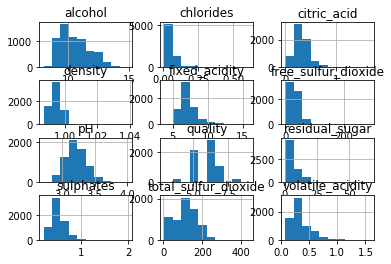

In [8]:
#Draw the histrograms for all numerical columns
data.hist()

In [9]:
#Observe the values range in each column and mean,std using describe()
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000
mean,7.215279,0.339611,0.318682,5.443781,0.056031,30.528325,115.757158,0.994696,3.218456,0.531264,10.491969,5.818504
std,1.296532,0.164588,0.145275,4.757967,0.035035,17.749112,56.517103,0.002999,0.160759,0.148817,1.192727,0.873263
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.375000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [10]:
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [11]:
#create a copy of the data. and separate the color column and store it in varible target.
#Store all other columns data as a DataFrame with name features
new_df = data.copy()
target = new_df.color
features = new_df.drop('color',axis=1)

In [12]:
# Apply Kmeans clustering with no of clusters as 2
from sklearn.cluster import KMeans
km = KMeans(2)
km.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
km.inertia_

8593925.131323857

In [14]:
pred = km.predict(features)
pred[:5]

array([1, 1, 1, 1, 1])

In [16]:
pred[6300:]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [18]:
new_df['pred'] = pred
new_df.groupby(['color','pred']).pred.count()

color  pred
red    0         85
       1       1513
white  0       3600
       1       1298
Name: pred, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
features[:]=sc.fit_transform(features)

In [21]:
features.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000,6496.000000
mean,0.282254,0.173074,0.191977,0.074291,0.078124,0.102529,0.252897,0.146253,0.386400,0.174867,0.361155,0.469751
std,0.107151,0.109726,0.087515,0.072975,0.058198,0.061629,0.130224,0.057811,0.124619,0.083605,0.172859,0.145544
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.164459,0.100829,0.302326,0.117978,0.217391,0.333333
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
km1 = KMeans(2)
km1.fit(features)
sc_pred = km1.predict(features)

In [26]:
new_df['sc_pred'] = sc_pred
new_df.groupby(['color','sc_pred']).sc_pred.count()

color  sc_pred
red    0           598
       1          1000
white  0          2063
       1          2835
Name: sc_pred, dtype: int64

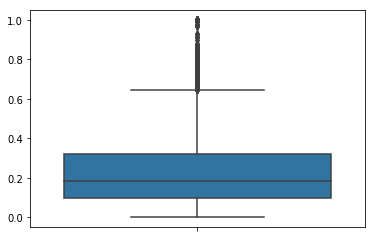

In [29]:
import seaborn as sns
sns.boxplot(y=features)

In [32]:
d ={}
for i in range(2,10):
    kn = KMeans(i)
    kn.fit(features)
    d[i] = kn.inertia_

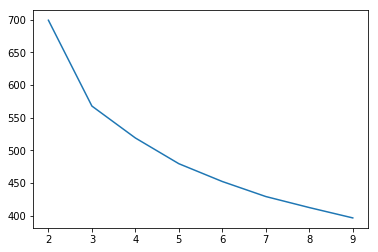

In [33]:
plt.plot(list(d.keys()),list(d.values()))

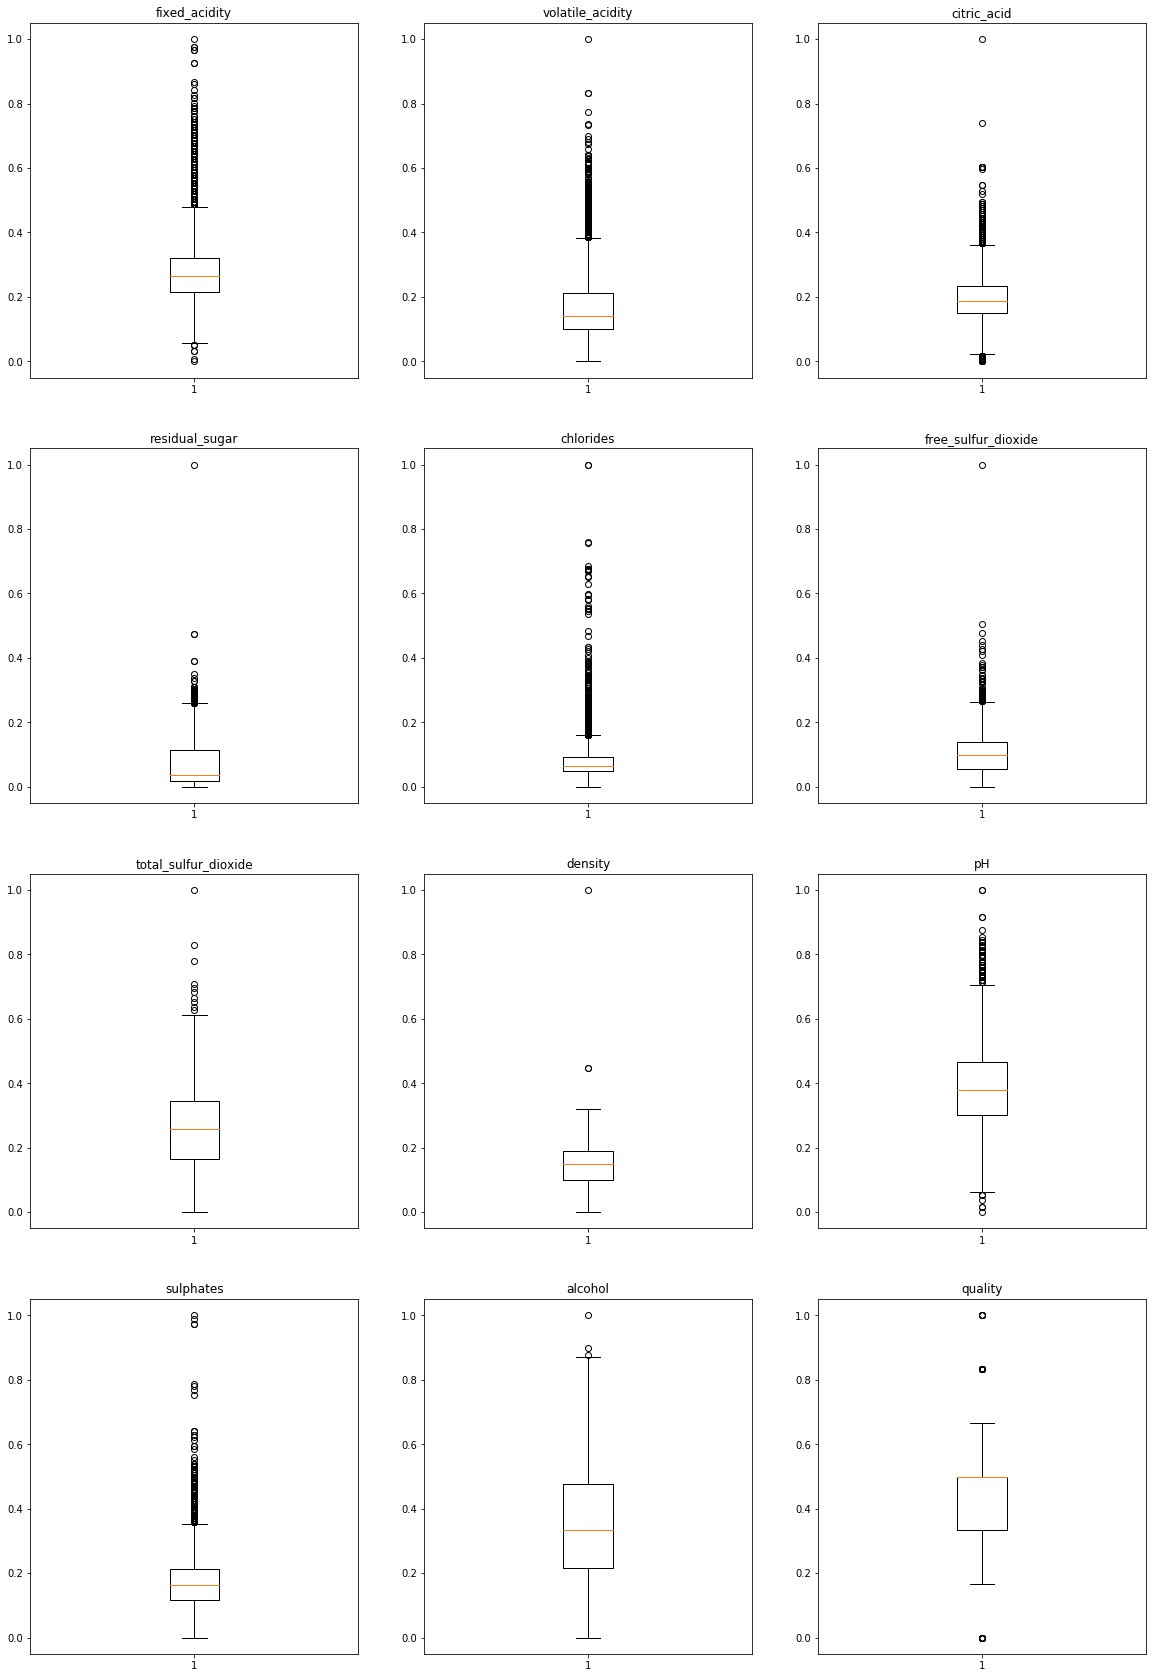

In [37]:
col = features.columns
plt.figure(figsize=(20,30))
for i in range(len(col)):
    plt.subplot(4,3,i+1)
    plt.boxplot(features[col[i]])
    plt.title(col[i])

In [38]:
quality = new_df.quality
features1 = new_df.drop(['color','quality'],axis=1)


In [39]:
quality.nunique()

7

In [40]:
kqua = KMeans(7)
kqua.fit(features1)
qpred = kqua.predict(features1)

In [41]:
new_df['qpred'] = qpred
new_df.groupby(['quality','qpred']).qpred.count()

quality  qpred
3        0          2
         1          3
         2          9
         3          3
         4          6
         5          5
         6          2
4        0         41
         1         30
         2         39
         3         32
         4          8
         5         43
         6         23
5        0        281
         1        377
         2        320
         3        358
         4        165
         5        260
         6        376
6        0        508
         1        368
         2        382
         3        610
         4        150
         5        314
         6        504
7        0        248
         1         64
         2        144
         3        316
         4         19
         5         82
         6        206
8        0         47
         1         14
         2         13
         3         61
         4          6
         5         13
         6         39
9        0          1
         3          4
Name: qpred, dtyp

In [42]:
new_df.groupby(['qpred','quality']).quality.count()

qpred  quality
0      3            2
       4           41
       5          281
       6          508
       7          248
       8           47
       9            1
1      3            3
       4           30
       5          377
       6          368
       7           64
       8           14
2      3            9
       4           39
       5          320
       6          382
       7          144
       8           13
3      3            3
       4           32
       5          358
       6          610
       7          316
       8           61
       9            4
4      3            6
       4            8
       5          165
       6          150
       7           19
       8            6
5      3            5
       4           43
       5          260
       6          314
       7           82
       8           13
6      3            2
       4           23
       5          376
       6          504
       7          206
       8           39
Name: quality, dt

In [43]:
new_df.groupby(['color','qpred']).quality.count()

color  qpred
red    0         172
       1           1
       2         874
       3          64
       4           2
       5         460
       6          25
white  0         956
       1         855
       2          33
       3        1320
       4         352
       5         257
       6        1125
Name: quality, dtype: int64

# Apply Supervised Learning 
for the same problem with color column as target

In [44]:
target.value_counts()

white    4898
red      1598
Name: color, dtype: int64

#### imbalanced Dataset use f1_score as metric 

In [50]:
# Change the target column into numerical
target_enc = target.apply(lambda x: 1 if x=='white' else 0)

In [51]:
# KNeighborsClassifier for original data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(features,target_enc)
ypred = knn.predict(features)

In [52]:
# f1_score for features without scaling
from sklearn.metrics import f1_score
f1_score(ypred,target_enc)


0.996124821537834